# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from utils.plots import plot_decision_regions
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

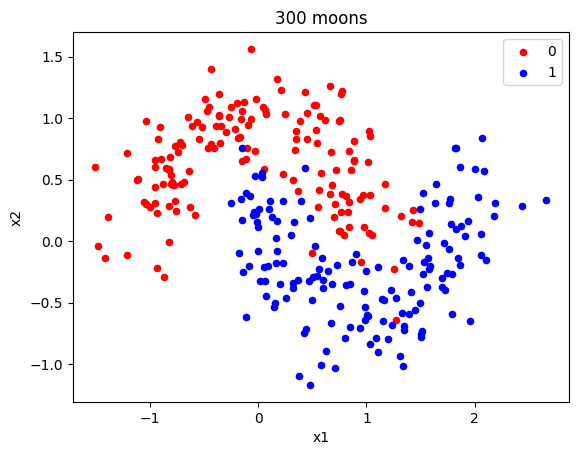

In [5]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

In [9]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)
X.shape

(250, 2)

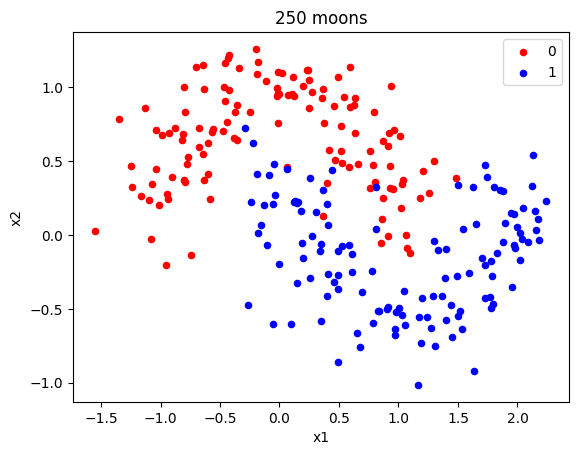

In [7]:
plot_moons(X, y)

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.7, random_state=42)

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [10]:
model= Sequential()
model.add(layers.Dense(5, activation='relu', input_dim= 2))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


2024-01-25 14:51:46.193444: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-25 14:51:46.194097: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-25 14:51:46.194129: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-8OFTMTN): /proc/driver/nvidia/version does not exist
2024-01-25 14:51:46.195948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model= Sequential()
    model.add(layers.Dense(5, activation='relu', input_dim= 2))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [13]:
parameters= 21

## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [14]:
history= model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.7867
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.7733
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7733
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.7733
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7733
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.7733
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6131 - accuracy: 0.7733
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6079 - accuracy: 0.7733
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7733
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7733
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8400
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8400
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8400
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8400
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8533
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8533
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.8533
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8533
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8533
Epoch 93/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8533
Epoch 94/100
8/8 [===============

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [15]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7fd07dc77ee0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6442701816558838,
   0.6386053562164307,
   0.6328393816947937,
   0.6281111240386963,
   0.6223095059394836,
   0.6175651550292969,
   0.6130792498588562,
   0.6079332232475281,
   0.6033739447593689,
   0.5985041856765747,
   0.5939273834228516,
   0.5895211696624756,
   0.5844622850418091,
   0.5804629325866699,
   0.5755945444107056,
   0.5712186098098755,
   0.5664921998977661,
   0.5623681545257568,
   0.5574826002120972,
   0.5533278584480286,
   0.5489471554756165,
   0.5444448590278625,
   0.5399526953697205,
   0.5353640913963318,
   0.5313681364059448,
   0.5268014073371887,
   0.5223193764686584,
   0.5186131596565247,
   0.5143113136291504,
   0.5099876523017883,
   0.5060445666313171,
   0.5015340447425842,
   0.4978958070278168,
   0.493742972612381,
   0.48956063389778137,
   0.4850965440273285,
   

❓ Plot the history of the train loss using the following function ❓

In [16]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

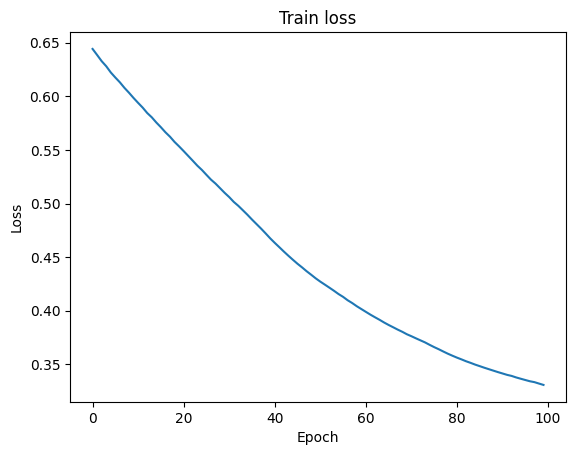

In [17]:
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [19]:
y_pred= model.predict(X_train)

3/3 [==============================] - 0s 1ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [36]:
eval_param= model.evaluate(X_test, y_test)
eval_param

6/6 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8514


[0.3378506004810333, 0.8514285683631897]

In [37]:
accuracy= eval_param[1]
accuracy

0.8514285683631897

**🧪 Test your code**

In [38]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/parissa/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/parissa/code/ParissaPeimaniyfard/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

1678/1678 [==============================] - 1s 599us/step


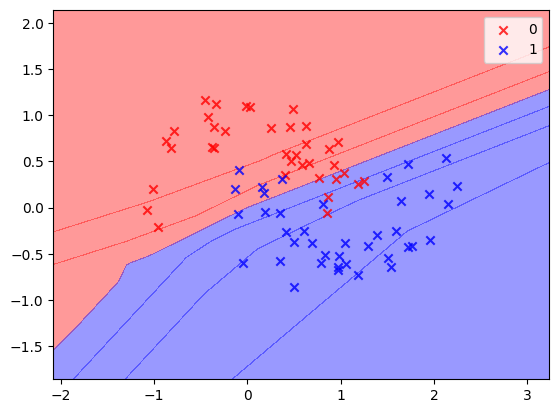

In [42]:
plot_decision_regions(X_train, y_train, classifier=model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [43]:
hist= history= model.fit(X_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8533
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8533
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8533
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8533
Epoch 5/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8533
Epoch 6/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8533
Epoch 7/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8533
Epoch 8/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8533
Epoch 9/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8533
Epoch 10/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8533
Epoch 11/500
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.8800
Epoch 85/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8800
Epoch 86/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2823 - accuracy: 0.8800
Epoch 87/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8800
Epoch 88/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8800
Epoch 89/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2813 - accuracy: 0.8800
Epoch 90/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2810 - accuracy: 0.8800
Epoch 91/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.8800
Epoch 92/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.8800
Epoch 93/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.8800
Epoch 94/500
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.2662 - accuracy: 0.8667
Epoch 168/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2660 - accuracy: 0.8667
Epoch 169/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2659 - accuracy: 0.8667
Epoch 170/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.8667
Epoch 171/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.8667
Epoch 172/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.8667
Epoch 173/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.8667
Epoch 174/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.8667
Epoch 175/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.8667
Epoch 176/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.8667
Epoch 177/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.2569 - accuracy: 0.8533
Epoch 250/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.8533
Epoch 251/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2562 - accuracy: 0.8533
Epoch 252/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2561 - accuracy: 0.8533
Epoch 253/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.8533
Epoch 254/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2564 - accuracy: 0.8533
Epoch 255/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2559 - accuracy: 0.8533
Epoch 256/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2558 - accuracy: 0.8533
Epoch 257/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.8533
Epoch 258/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2556 - accuracy: 0.8533
Epoch 259/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.8533
Epoch 332/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.8533
Epoch 333/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.8533
Epoch 334/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.8533
Epoch 335/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.8533
Epoch 336/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.8533
Epoch 337/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.8533
Epoch 338/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.8533
Epoch 339/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2499 - accuracy: 0.8533
Epoch 340/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2498 - accuracy: 0.8533
Epoch 341/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8667
Epoch 414/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8667
Epoch 415/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8667
Epoch 416/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.8667
Epoch 417/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8667
Epoch 418/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2465 - accuracy: 0.8667
Epoch 419/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.8667
Epoch 420/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2464 - accuracy: 0.8667
Epoch 421/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.8667
Epoch 422/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2465 - accuracy: 0.8667
Epoch 423/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.8667
Epoch 496/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.8667
Epoch 497/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.8667
Epoch 498/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.8667
Epoch 499/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.8667
Epoch 500/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 0.8667


❓ Did the test accuracy improve? ❓

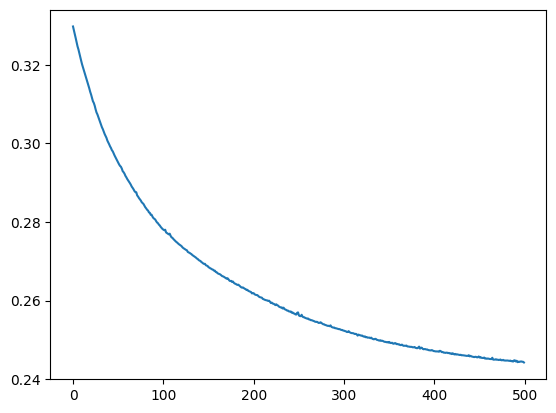

In [46]:
plt.plot(hist.history['loss'])

In [48]:
eval_param_for500= model.evaluate(X_test, y_test)
eval_param_for500

6/6 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.8800


[0.2744969427585602, 0.8799999952316284]

1678/1678 [==============================] - 1s 622us/step


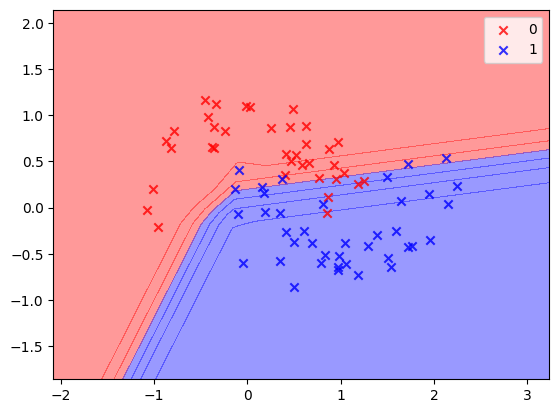

In [49]:
plot_decision_regions(X_train, y_train, classifier=model)

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [50]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model= Sequential()
    model.add(layers.Dense(20, activation='relu', input_dim= 2))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                60        
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [52]:
hist_3= model.fit(X_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.2000
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.2000
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.3333
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4133
Epoch 5/500
8/8 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5067
Epoch 6/500
8/8 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5333
Epoch 7/500
8/8 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.5333
Epoch 8/500
8/8 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.5467
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.5467
Epoch 10/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.5600
Epoch 11/500
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.8533
Epoch 85/500
8/8 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.8667
Epoch 86/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.8933
Epoch 87/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2355 - accuracy: 0.8800
Epoch 88/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2322 - accuracy: 0.8933
Epoch 89/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2322 - accuracy: 0.8933
Epoch 90/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2306 - accuracy: 0.8800
Epoch 91/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.8800
Epoch 92/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.8800
Epoch 93/500
8/8 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.8800
Epoch 94/500
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.9733
Epoch 168/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9733
Epoch 169/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1163 - accuracy: 0.9600
Epoch 170/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.9733
Epoch 171/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9733
Epoch 172/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9733
Epoch 173/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1113 - accuracy: 0.9733
Epoch 174/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9733
Epoch 175/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9733
Epoch 176/500
8/8 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.9733
Epoch 177/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9733
Epoch 250/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9733
Epoch 251/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9600
Epoch 252/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9600
Epoch 253/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9733
Epoch 254/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9733
Epoch 255/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9600
Epoch 256/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 0.9733
Epoch 257/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9733
Epoch 258/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9733
Epoch 259/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9733
Epoch 332/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9733
Epoch 333/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9733
Epoch 334/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9733
Epoch 335/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9867
Epoch 336/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9733
Epoch 337/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9733
Epoch 338/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9733
Epoch 339/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9733
Epoch 340/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9733
Epoch 341/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9733
Epoch 414/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.9733
Epoch 415/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.9733
Epoch 416/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9733
Epoch 417/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0484 - accuracy: 0.9733
Epoch 418/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9733
Epoch 419/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9733
Epoch 420/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9733
Epoch 421/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9733
Epoch 422/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9733
Epoch 423/500
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9733
Epoch 496/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9867
Epoch 497/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9867
Epoch 498/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9733
Epoch 499/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9733
Epoch 500/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9733


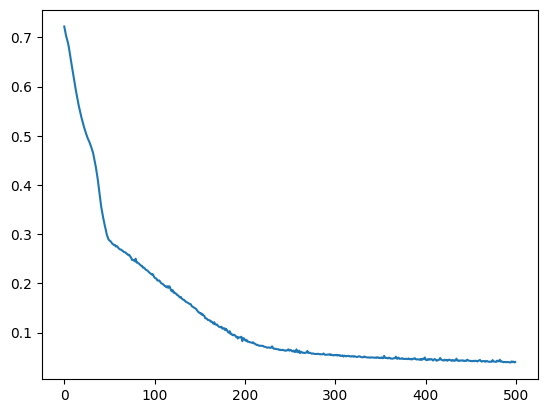

In [53]:
plt.plot(hist_3.history['loss'])

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [ ]:
model.evaluate(X_test, y_test, )

🧪 **Test your code**

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())

❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

In [ ]:
# YOUR CODE HERE

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!